In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('unicorns.csv')
data = data.rename(columns={'Last Valuation (Billion $)': 'Valuation'})
data.set_index('Company')

,Updated at,Crunchbase Url,Valuation,Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
Company,,,,,,,,,,
Esusu,"10/31/2022, 2:37:05 AM",https://www.cbinsights.com/company/esusu,1.00,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
Fever Labs,"10/31/2022, 2:37:05 AM",https://www.cbinsights.com/company/fever-labs,1.00,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
Minio,"10/31/2022, 2:37:04 AM",https://www.cbinsights.com/company/minio,1.00,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
Darwinbox,"10/31/2022, 2:37:04 AM",https://www.cbinsights.com/company/darwinbox,1.00,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
Pentera,"10/31/2022, 2:37:04 AM",https://www.cbinsights.com/company/pcysys,1.00,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN
...,...,...,...,...,...,...,...,...,...,...
Fanatics,"10/31/2022, 2:32:42 AM",https://www.cbinsights.com/company/fanatics,27.00,6/6/2012,2012,Jacksonville,United States,E-commerce & direct-to-consumer,"[""SoftBank Group"",""Andreessen Horowitz"",""Temas...",NaN
SpaceX,"10/31/2022, 2:32:38 AM",https://www.cbinsights.com/company/space-explo...,127.00,12/1/2012,2012,Hawthorne,United States,Other,"[""Founders Fund"",""Draper Fisher Jurvetson"",""Ro...",NaN
Vice Media,"10/31/2022, 2:33:10 AM",https://www.cbinsights.com/company/vice-media,5.70,4/2/2011,2011,Brooklyn,United States,Internet software & services,"[""Technology Crossover Ventures"",""A&E Televisi...",NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Updated at       1199 non-null   object 
 1   Company          1199 non-null   object 
 2   Crunchbase Url   1199 non-null   object 
 3   Valuation        1199 non-null   float64
 4   Date Joined      1199 non-null   object 
 5   Year Joined      1199 non-null   int64  
 6   City             1181 non-null   object 
 7   Country          1199 non-null   object 
 8   Industry         1199 non-null   object 
 9   Investors        1199 non-null   object 
 10  Company Website  0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 103.2+ KB


# 1.1 determine how many industries are represented in the data and how much each

<AxesSubplot:>

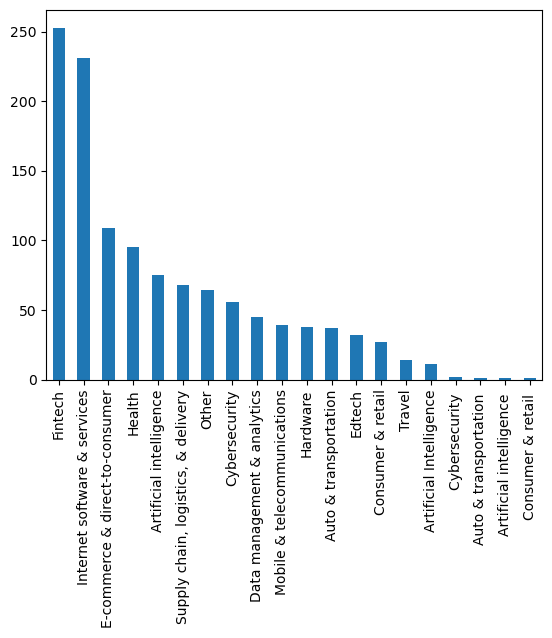

In [4]:
data['Industry'].value_counts().plot(kind='bar')

# determine which nation has the most fintech-based startups.

<AxesSubplot:>

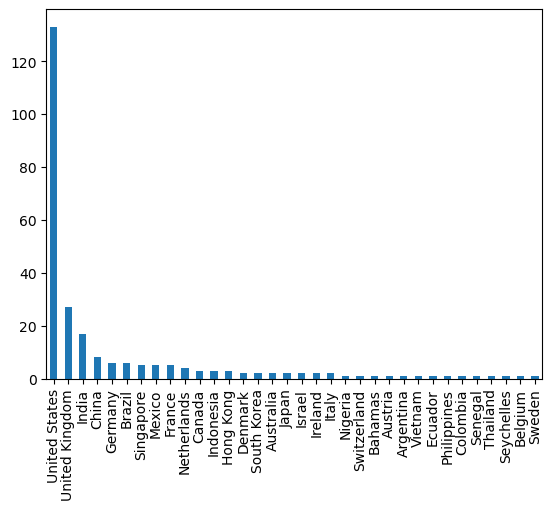

In [5]:
fintech_df=data.loc[data.Industry== 'Fintech']
fintech_df['Country'].value_counts().plot(kind='bar')

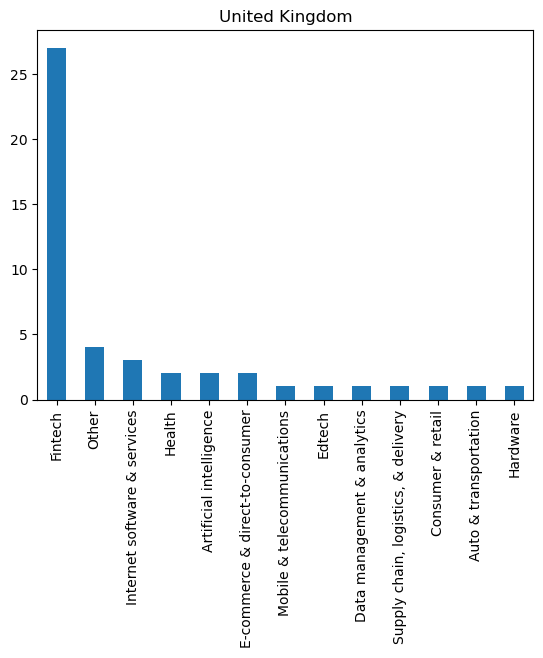

In [6]:
def industrys_and_country(state):
    data_ind=data.loc[data.Country.isin([state])]
    data_ind.Industry.value_counts().plot(kind='bar',title=state)
industrys_and_country('United Kingdom')

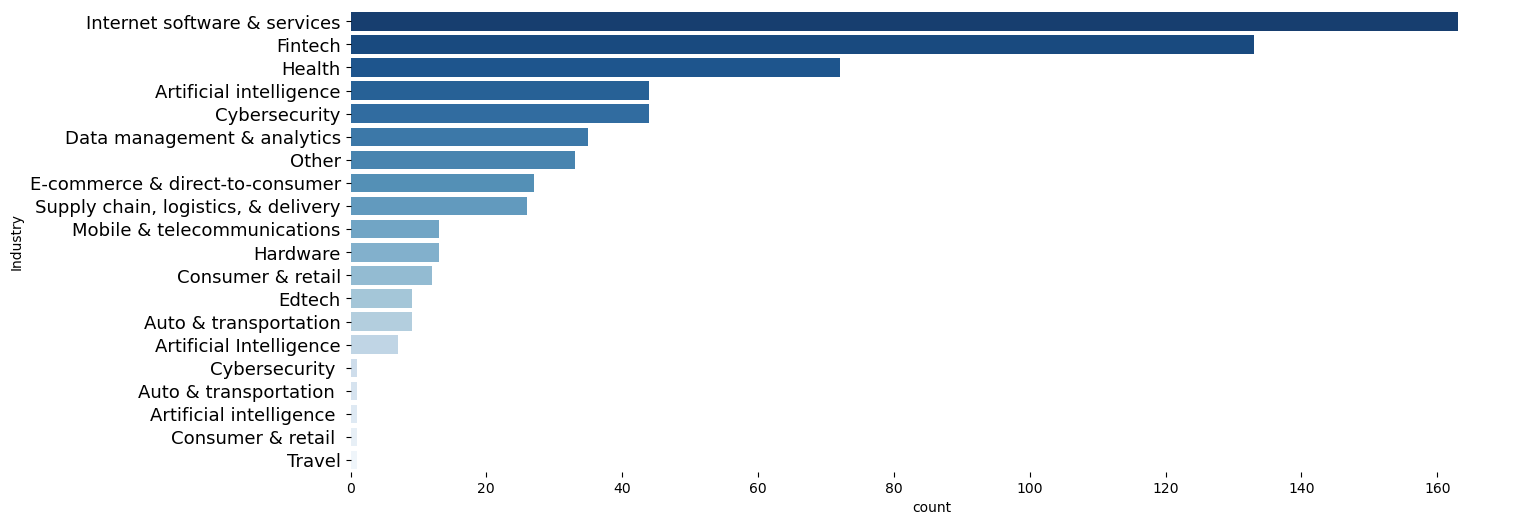

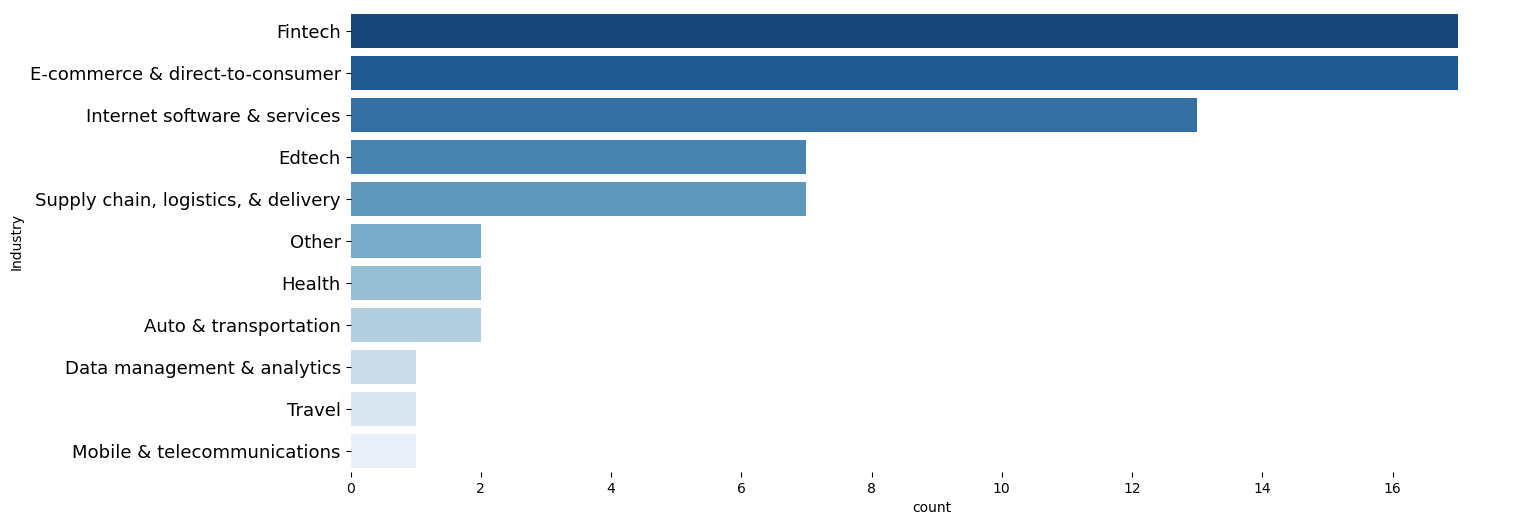

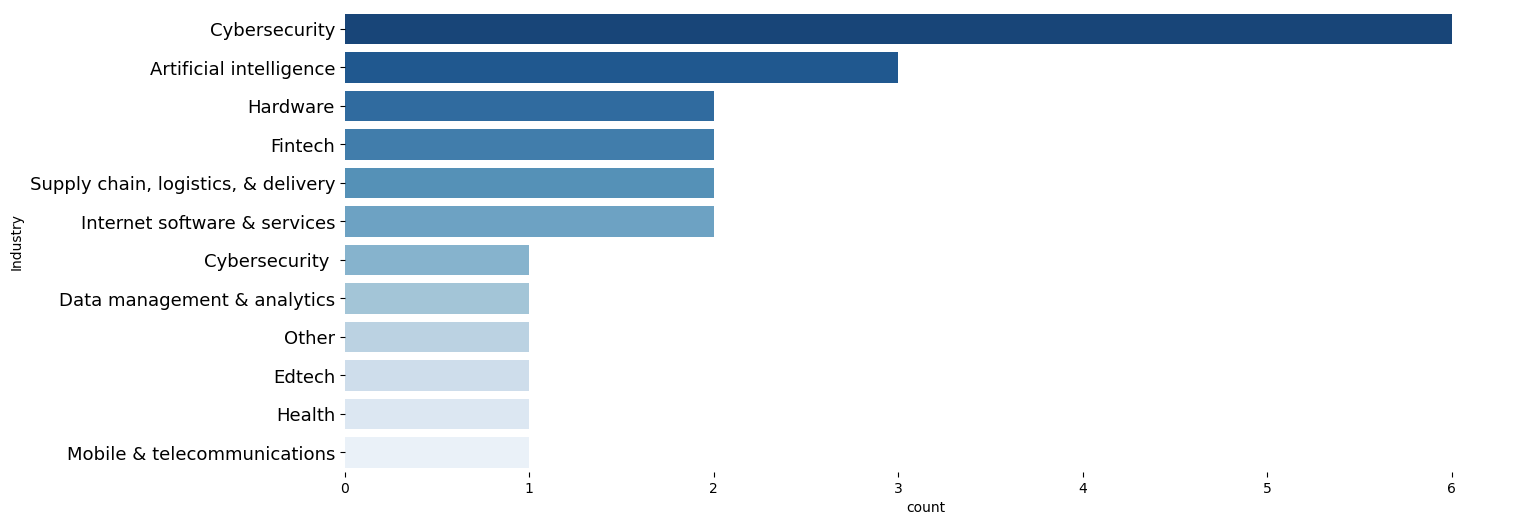

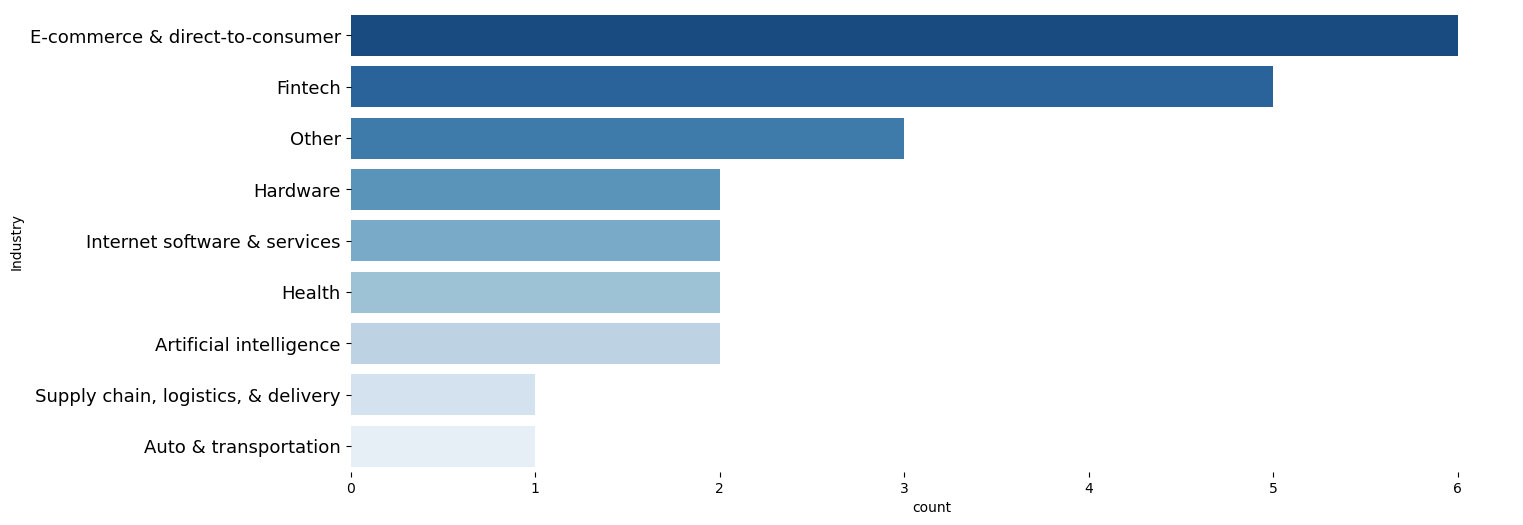

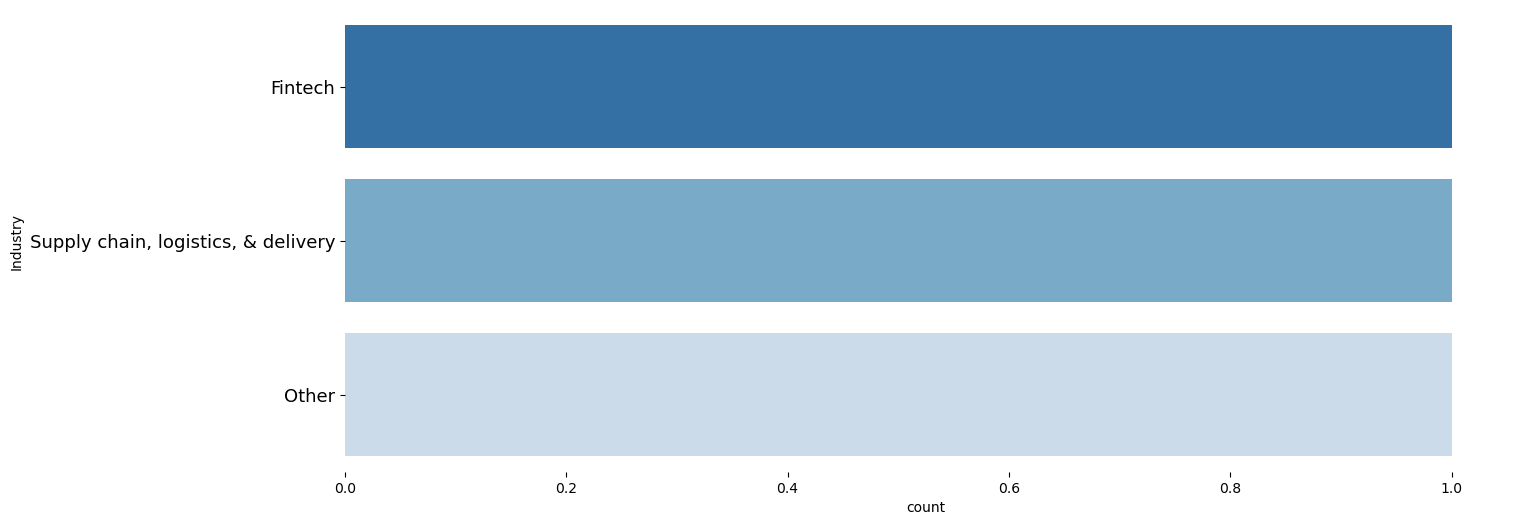

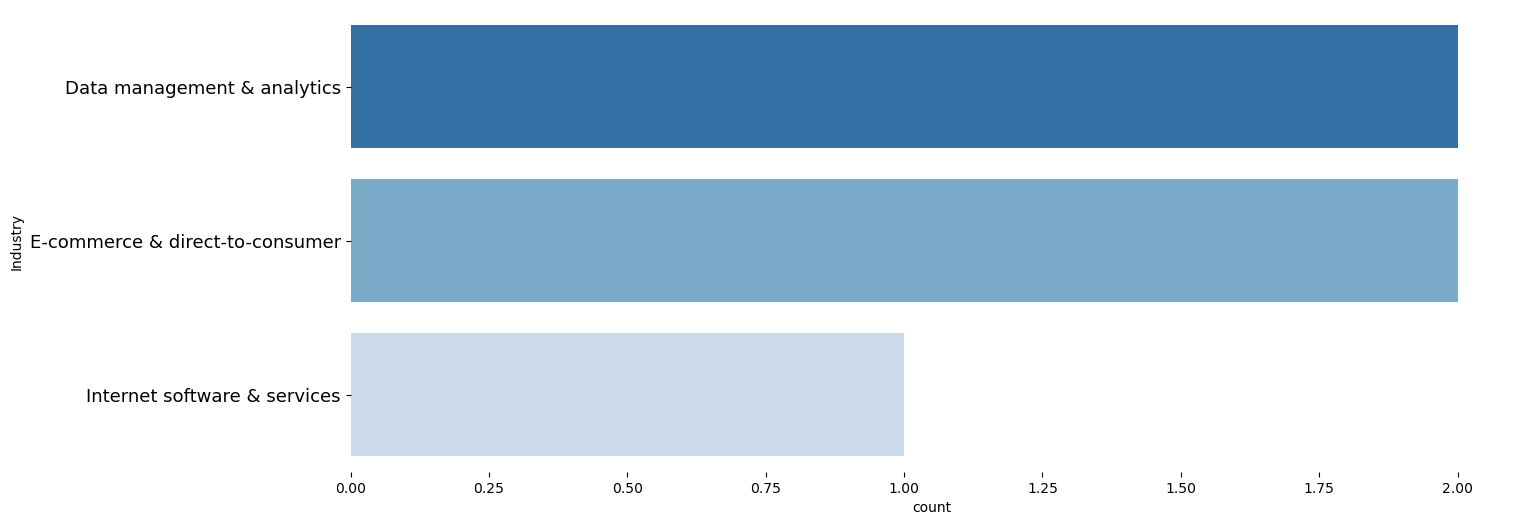

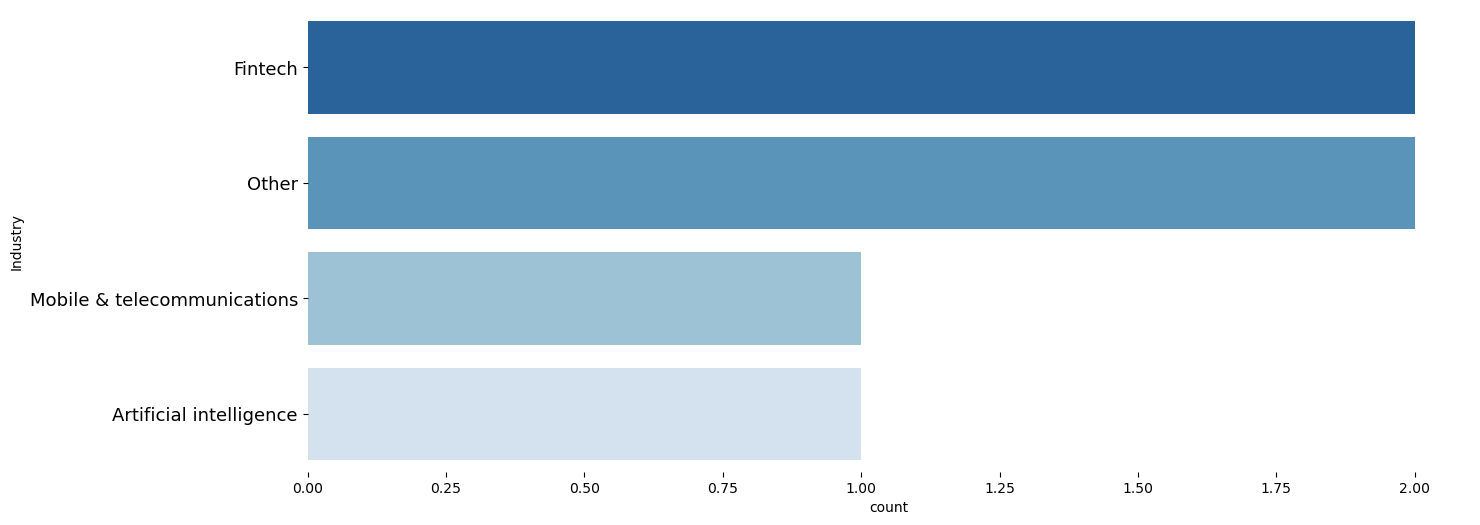

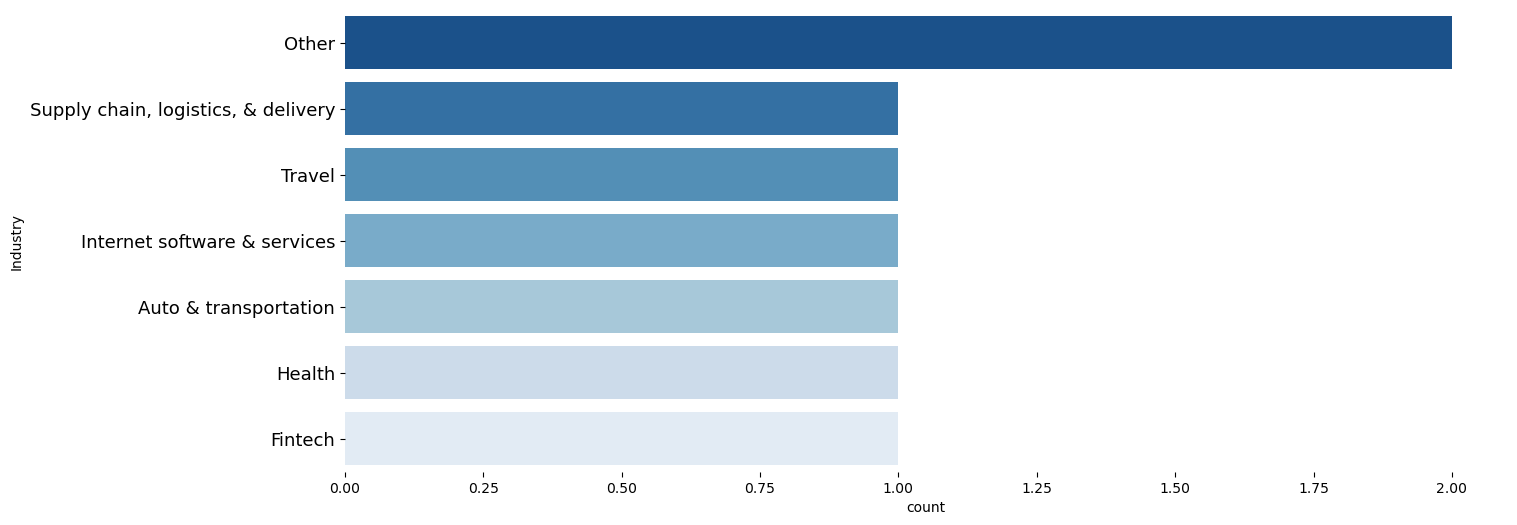

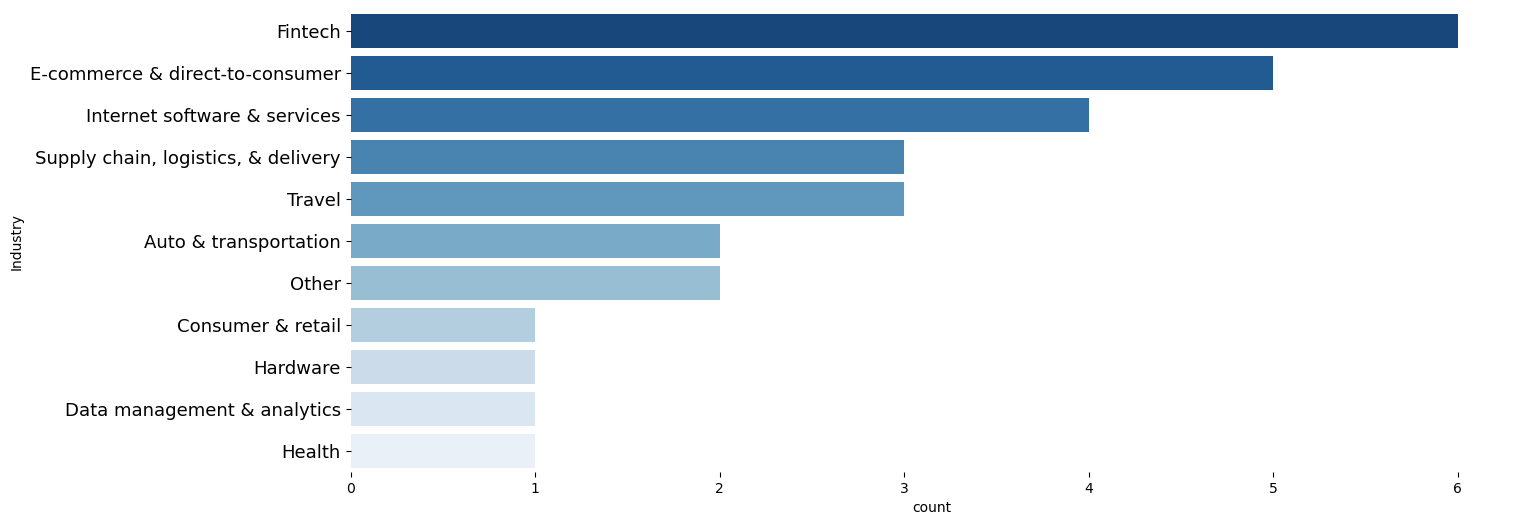

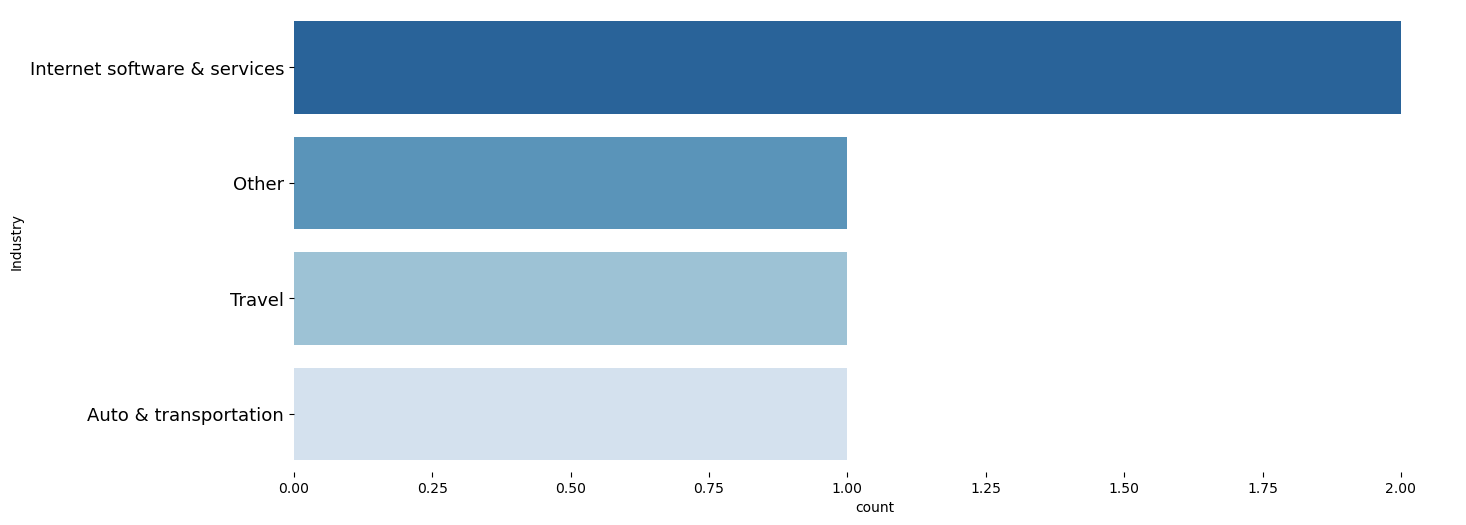

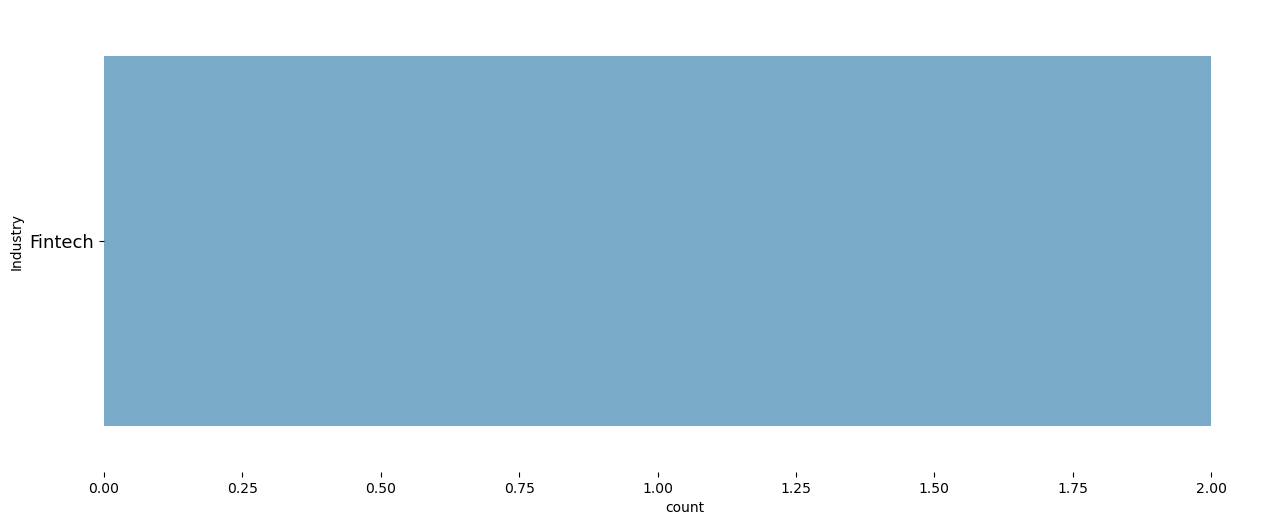

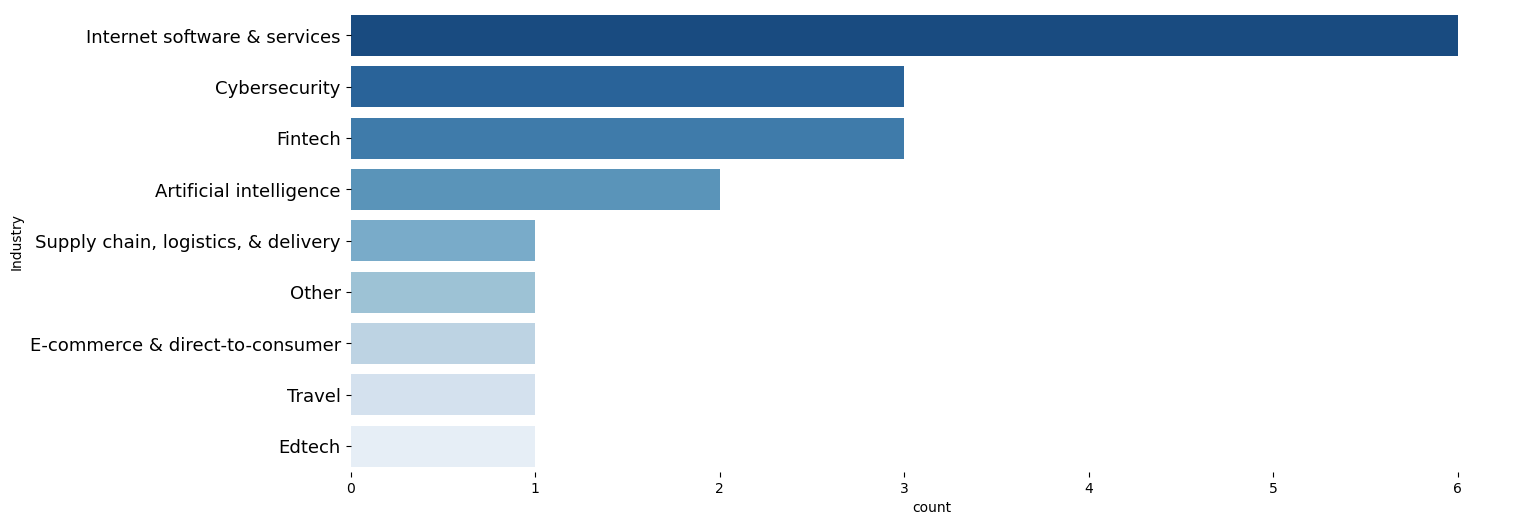

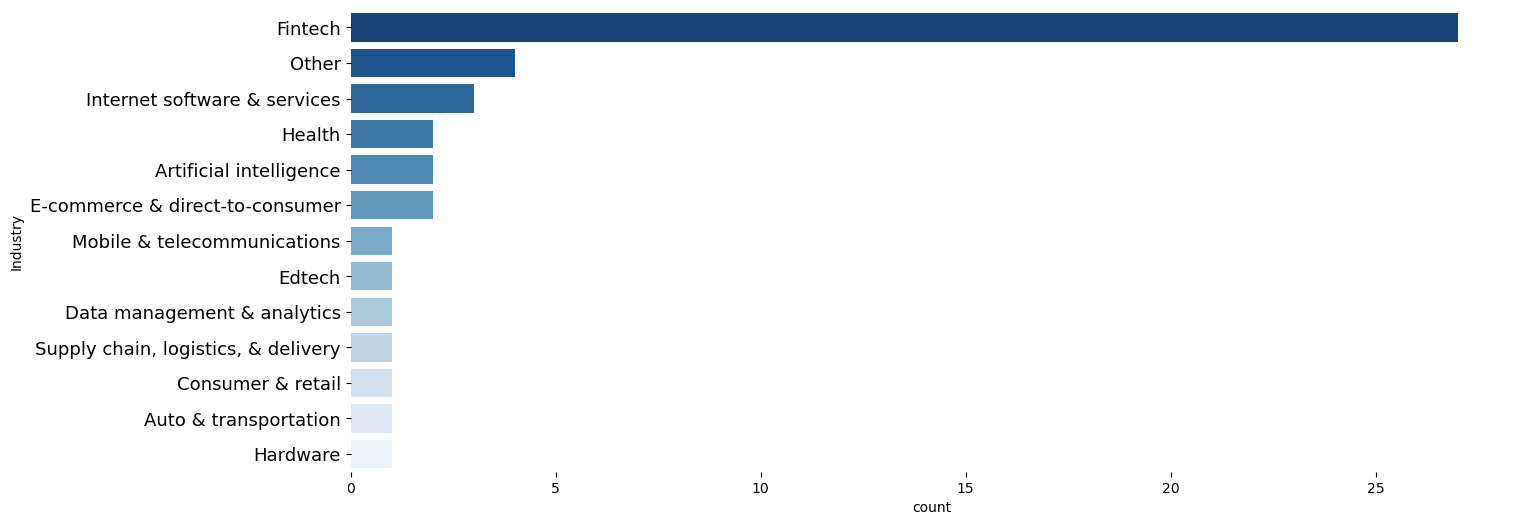

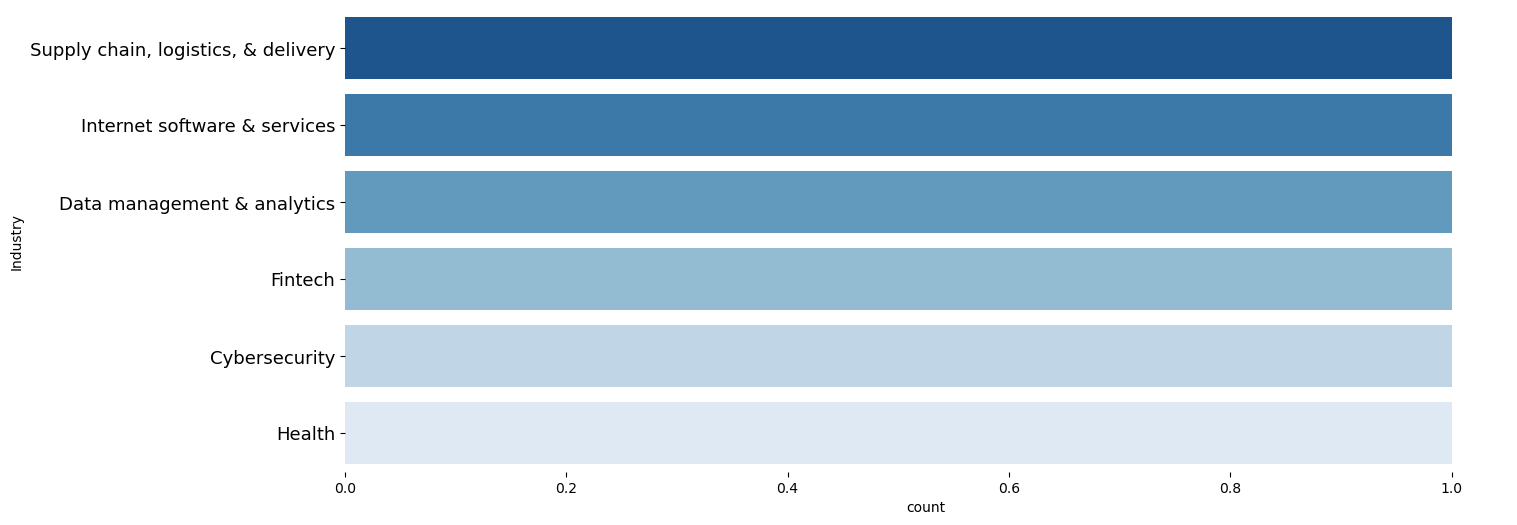

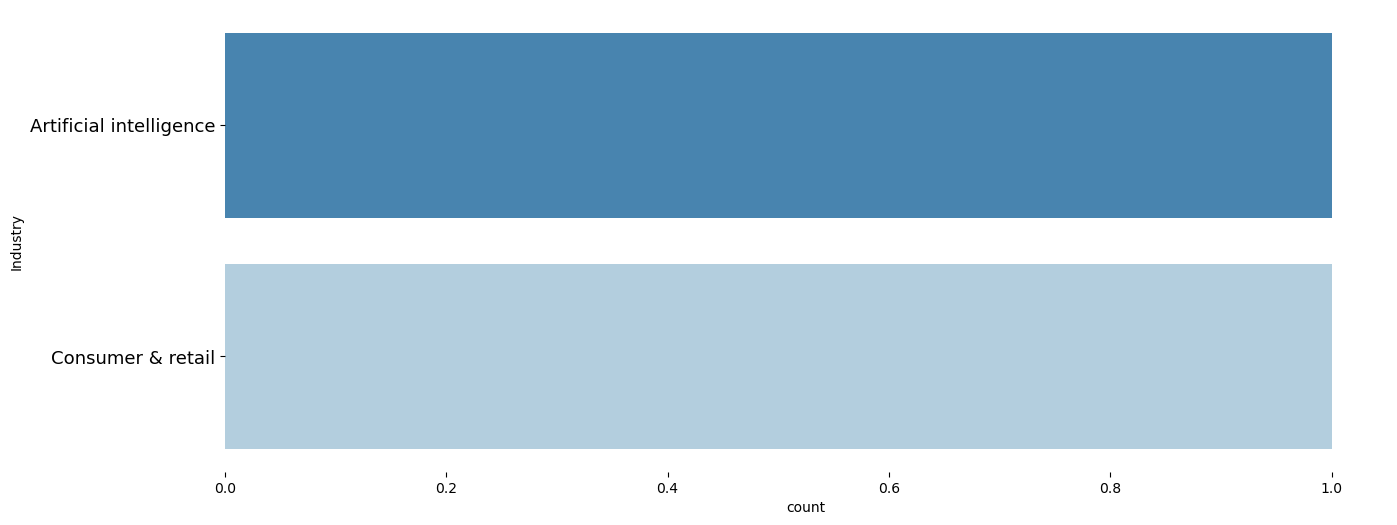

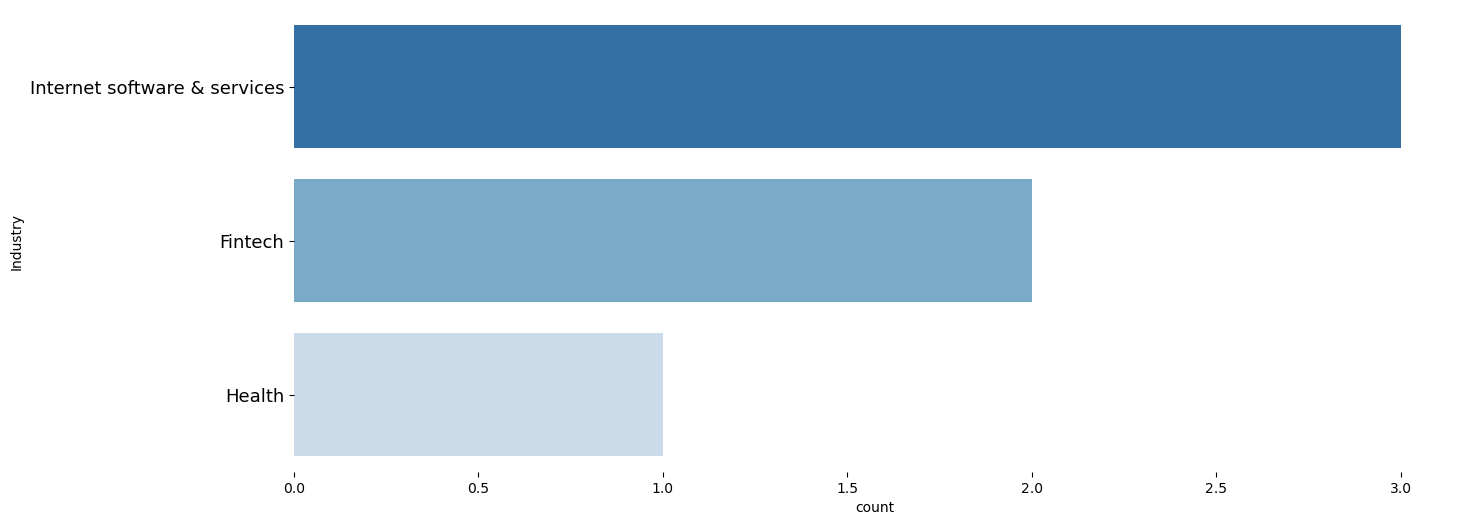

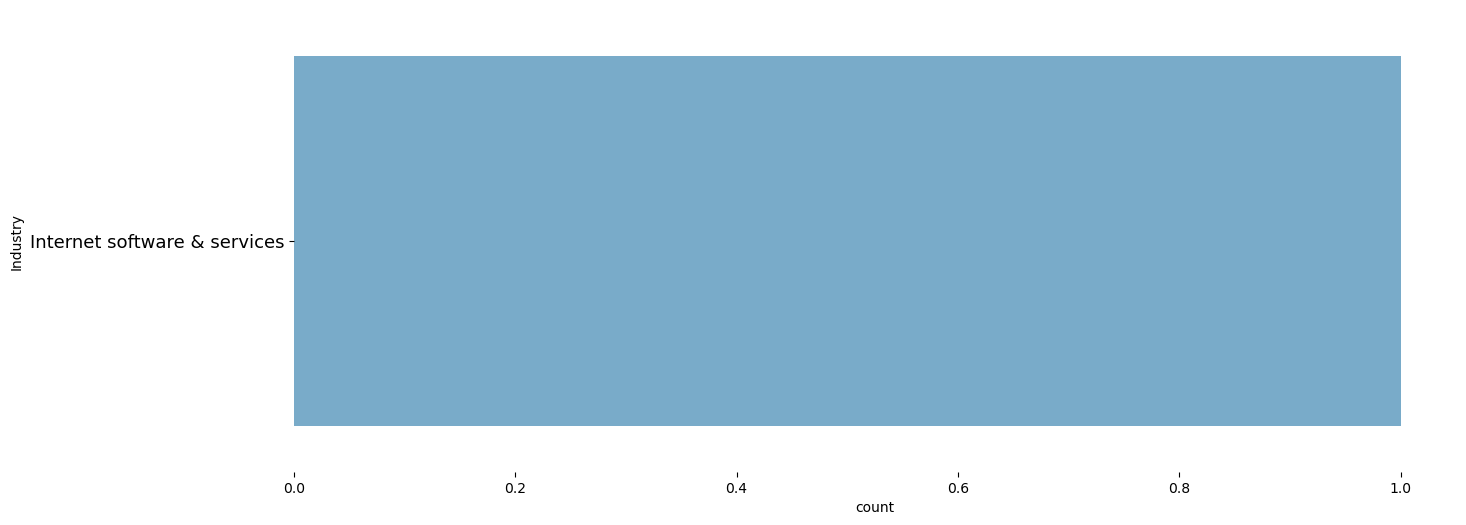

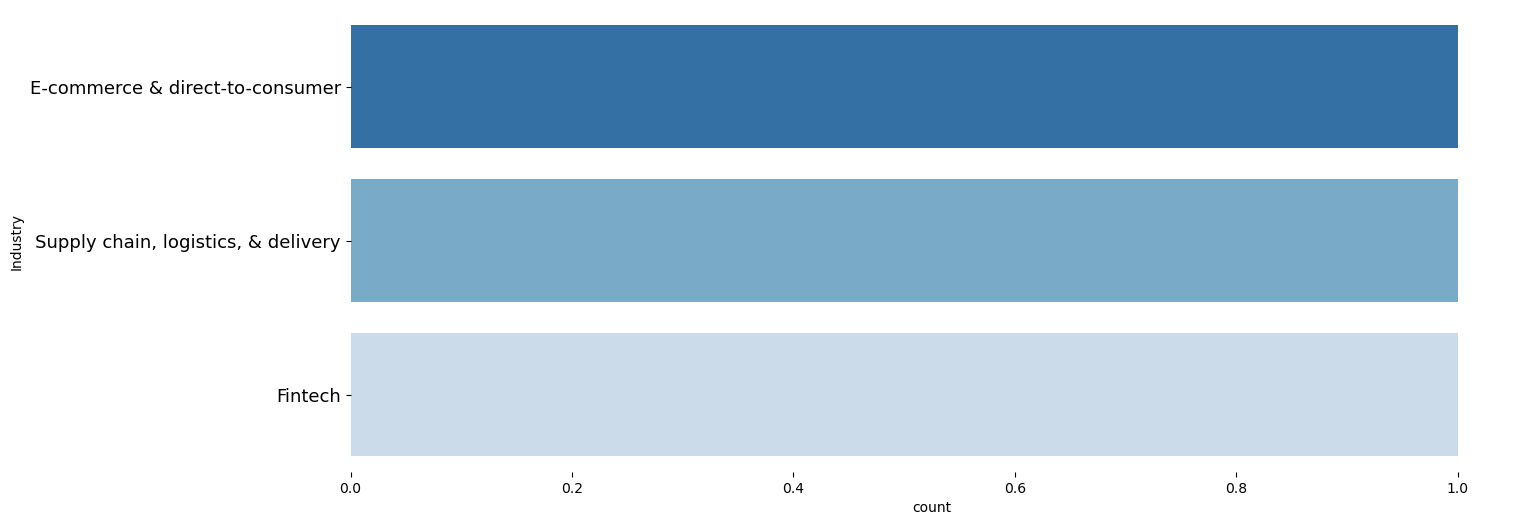

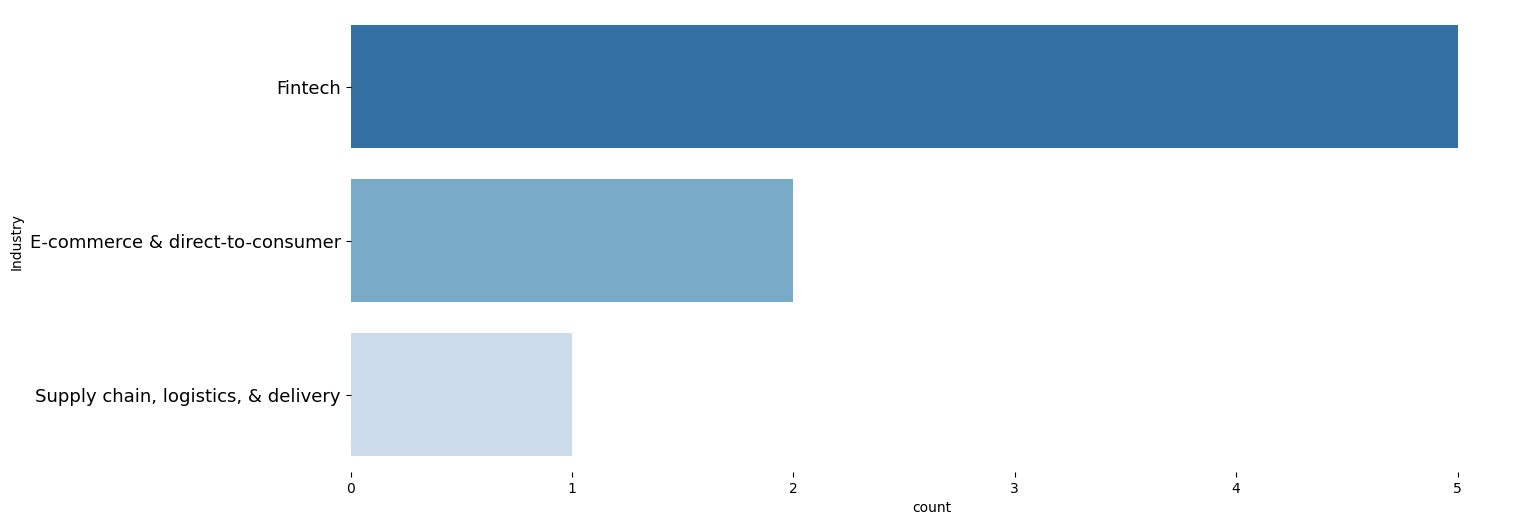

In [7]:
country=data["Country"].unique()
col=['United States', 'India', 'Israel', 'France', 'Colombia', 'Norway',
        'Japan', 'Sweden', 'Germany', 'Spain', 'Italy', 'Canada',
        'United Kingdom', 'Switzerland', 'Chile', 'Ireland',
        'Liechtenstein', 'Thailand', 'Mexico']

for i in col:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    data_ind=data.loc[data.Country.isin([i])]
    sns.countplot(y=data_ind["Industry"],data=data_ind,palette='Blues_r',order=data_ind["Industry"].value_counts().index)
    plt.yticks(fontsize=13)
    sns.title=(i)
    plt.box(False)
    plt.show()

<AxesSubplot:>

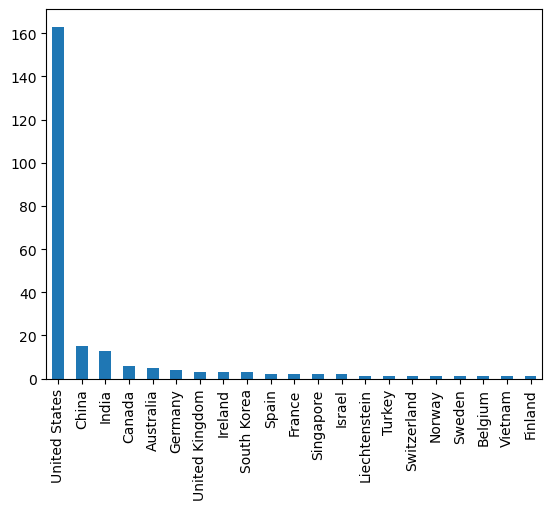

In [8]:
Internet_software_services_df=data.loc[data.Industry== 'Internet software & services']
Internet_software_services_df['Country'].value_counts().plot(kind='bar')

As can be seen, Fintech has the highest number of startups, followed by internet software companies.

# 1.2 Let's see which year has the most startups established And which are they

<AxesSubplot:>

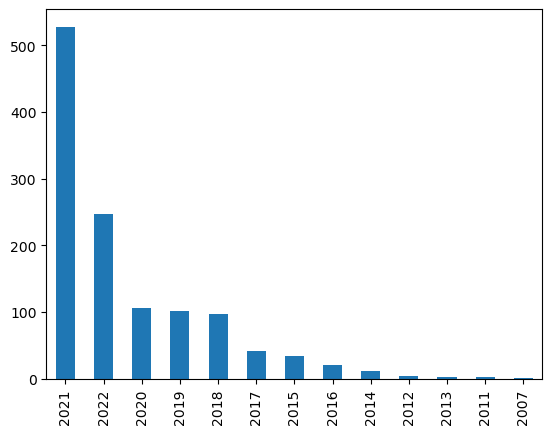

In [9]:
data['Year Joined'].value_counts().plot(kind='bar')

In [10]:
Compony_22=data.loc[data['Year Joined'] == 2022]
Compony_22['Company']

0                   Esusu
1              Fever Labs
2                   Minio
3               Darwinbox
4                 Pentera
              ...        
242                 Qonto
243    The Boring Company
244                 RELEX
245                KuCoin
246                  Miro
Name: Company, Length: 247, dtype: object

<AxesSubplot:>

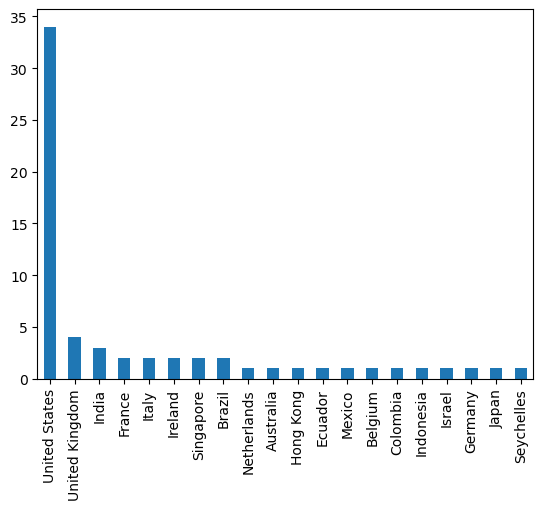

In [11]:
comp_2022_fintech=data.loc[(data.Industry =='Fintech') & (data['Year Joined']==2022)]
comp_2022_fintech['Country'].value_counts().plot(kind='bar')

As can be seen, the United States will have the most established Fintech Startups by 2022.

<AxesSubplot:>

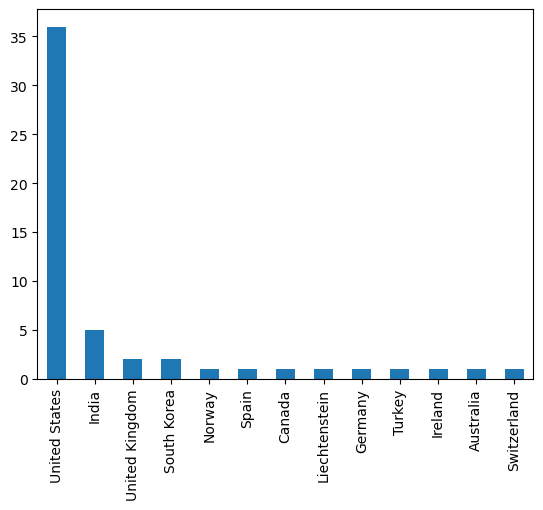

In [12]:
comp_2022_Internet=data.loc[(data.Industry =='Internet software & services') & (data['Year Joined']==2022)]
comp_2022_Internet['Country'].value_counts().plot(kind='bar')

In [13]:
data.groupby(['Industry','Country']).Valuation.agg([min,max,len])

min   max  len
Industry                Country                      
Artificial Intelligence China          1.0  1.46    4
                        United States  1.0  2.50    7
Artificial intelligence Bermuda        1.6  1.60    1
                        Brazil         2.6  2.60    1
                        Canada         1.0  1.20    2
...                                    ...   ...  ...
Travel                  Indonesia      3.0  3.00    1
                        South Korea    1.0  1.00    1
                        Spain          1.3  1.30    1
                        Sweden         1.0  1.00    1
                        United States  9.2  9.20    1

[216 rows x 3 columns]

In [14]:
data

,Updated at,Company,Crunchbase Url,Valuation,Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.00,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.00,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.00,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.00,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.00,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1194,"10/31/2022, 2:32:42 AM",Fanatics,https://www.cbinsights.com/company/fanatics,27.00,6/6/2012,2012,Jacksonville,United States,E-commerce & direct-to-consumer,"[""SoftBank Group"",""Andreessen Horowitz"",""Temas...",NaN
1195,"10/31/2022, 2:32:38 AM",SpaceX,https://www.cbinsights.com/company/space-explo...,127.00,12/1/2012,2012,Hawthorne,United States,Other,"[""Founders Fund"",""Draper Fisher Jurvetson"",""Ro...",NaN
1196,"10/31/2022, 2:33:10 AM",Vice Media,https://www.cbinsights.com/company/vice-media,5.70,4/2/2011,2011,Brooklyn,United States,Internet software & services,"[""Technology Crossover Ventures"",""A&E Televisi...",NaN
1197,"10/31/2022, 2:33:05 AM",Klarna,https://www.cbinsights.com/company/klarna,6.70,12/12/2011,2011,Stockholm,Sweden,Fintech,"[""Institutional Venture Partners"",""Sequoia Cap...",NaN


# Is there a particular geographical region that is driving the growth of Fintech startups or internet software companies? 

# Let's now determine which industries India has.

Fintech                                17
E-commerce & direct-to-consumer        17
Internet software & services           13
Edtech                                  7
Supply chain, logistics, & delivery     7
Other                                   2
Health                                  2
Auto & transportation                   2
Data management & analytics             1
Travel                                  1
Mobile & telecommunications             1
Name: Industry, dtype: int64

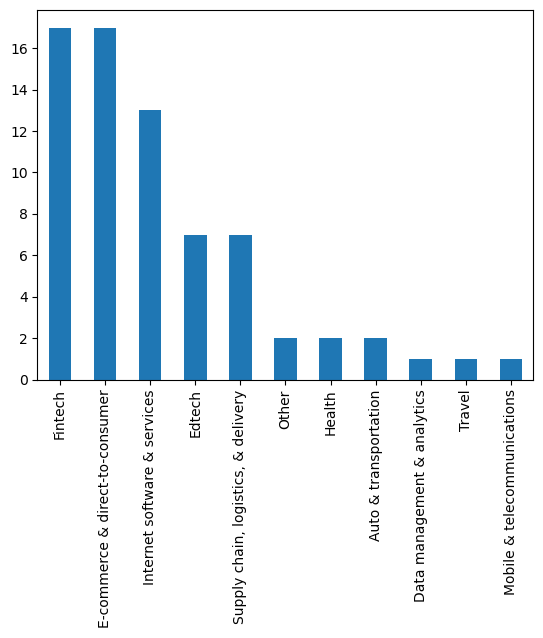

In [15]:
data_ind=data.loc[data.Country.isin(['India'])]
data_ind.Industry.value_counts().plot(kind='bar')
data_ind['Industry'].value_counts()

# Which startups in India are more valuable, and what are they?

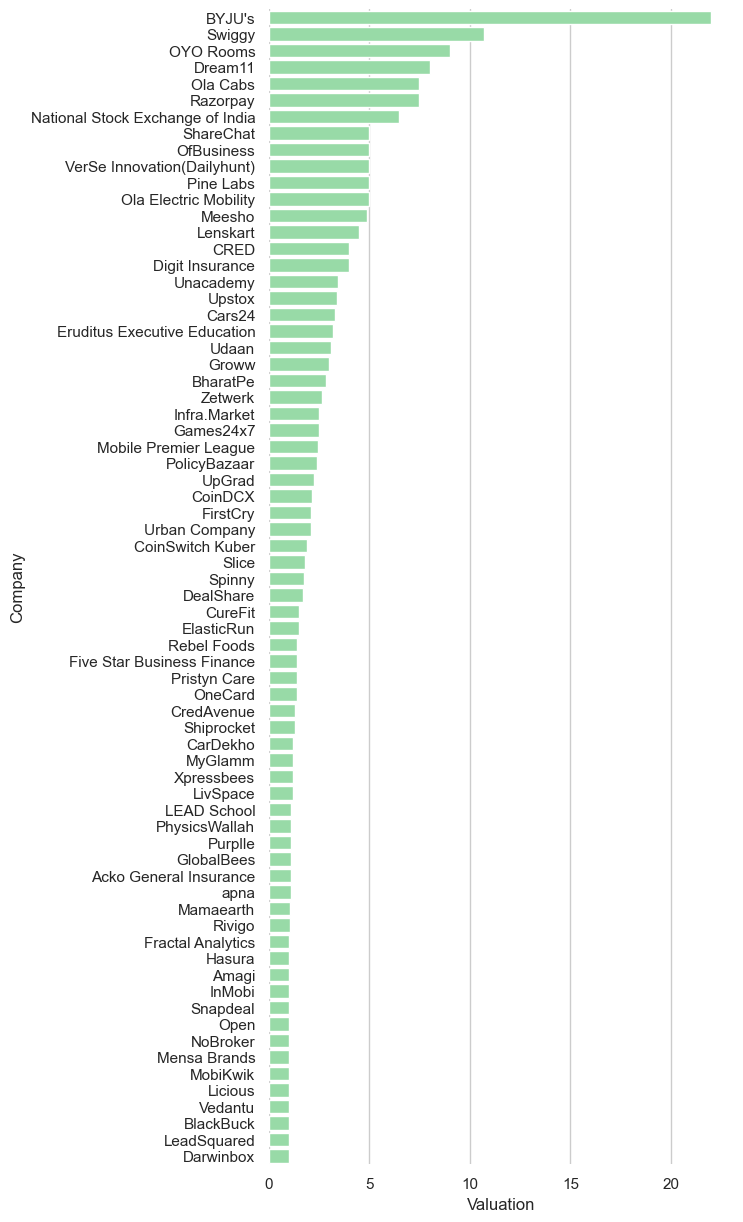

In [16]:
ind_sorted_df=data_ind.sort_values("Valuation", ascending=False)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Valuation", y="Company", data=ind_sorted_df,
            label="Valuation", color="g")
sns.despine(left=True, bottom=True)

# Let's take a look at where each fintech startup is located in India. 

<AxesSubplot:>

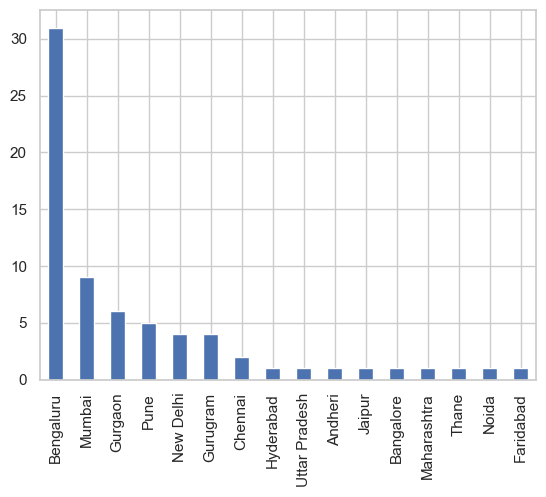

In [17]:
fin_df=data.loc[data['Industry'] == 'Fintech']
ind_fin_df=data.loc[data.Country.isin(['India'])]
ind_fin_df['City'].value_counts().plot(kind='bar')

D:\Documents\anacondadrive\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Industry', ylabel='count'>

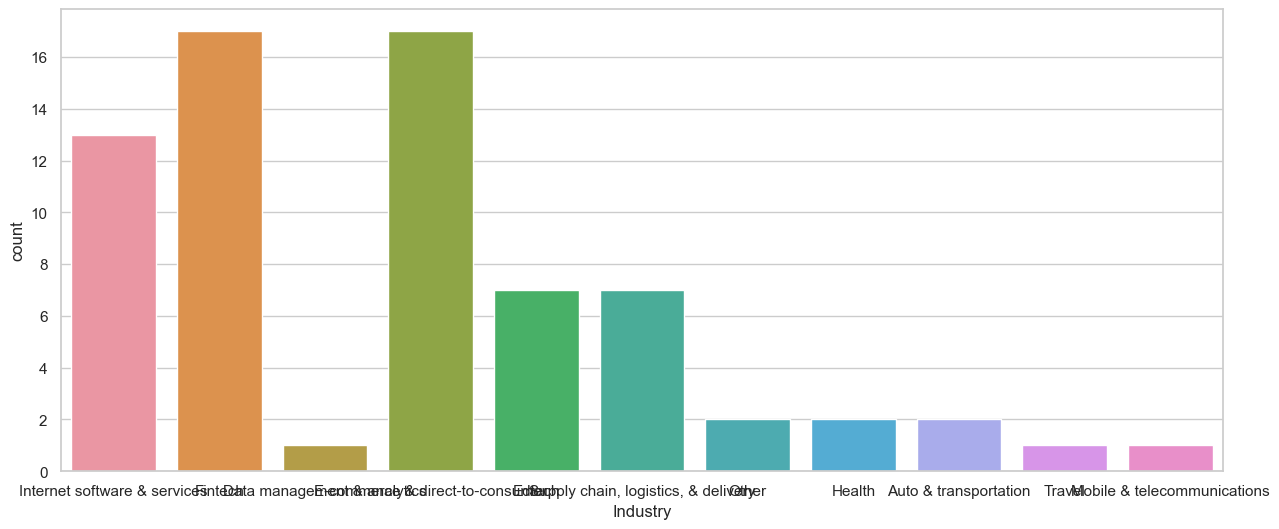

In [31]:

f, ax = plt.subplots(figsize=(15, 6))
data_ind=data.loc[data.Country.isin(['India'])]
sns.countplot(data_ind["Industry"],data=data_ind)

array(['Fintech', 'Internet software & services',
       'Data management & analytics', 'Cybersecurity ',
       'Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer',
       'Supply chain, logistics, & delivery', 'Hardware', 'Cybersecurity',
       'Health', 'Auto & transportation', 'Mobile & telecommunications',
       'Artificial Intelligence', 'Consumer & retail', 'Edtech', 'Travel',
       'Auto & transportation ', 'Artificial intelligence ',
       'Consumer & retail '], dtype=object)

<AxesSubplot:>

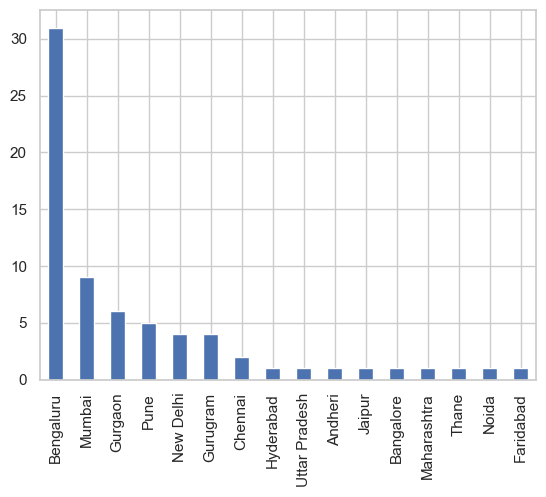

In [26]:
fin_df=data.loc[data['Industry'] == 'Internet software & services']
ind_fin_df=data.loc[data.Country.isin(['India'])]
ind_fin_df['City'].value_counts().plot(kind='bar')

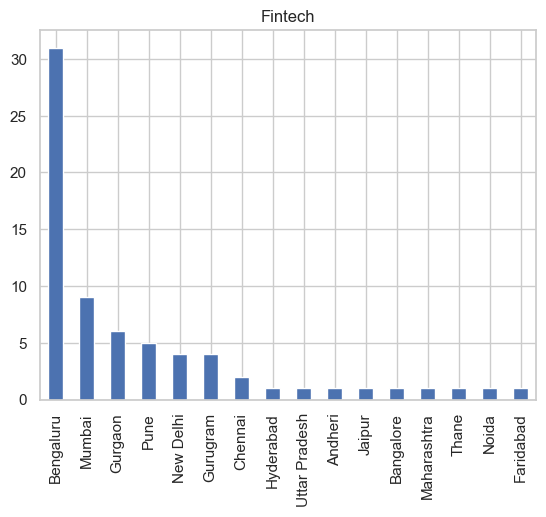

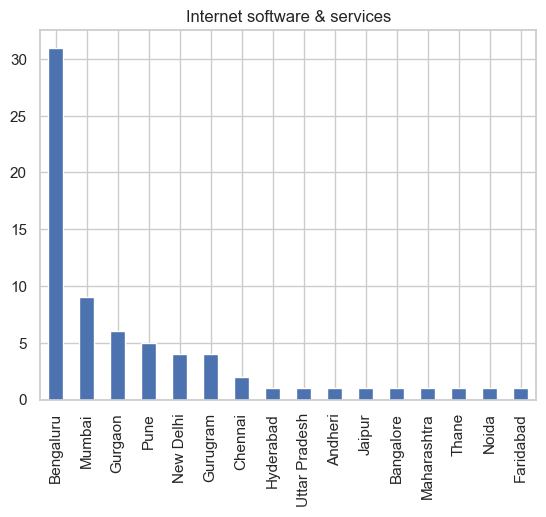

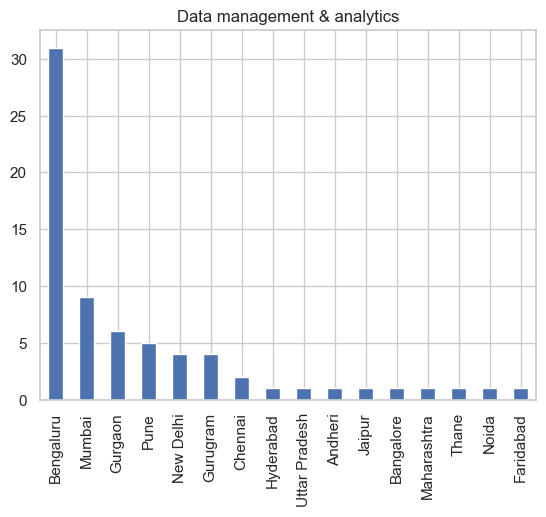

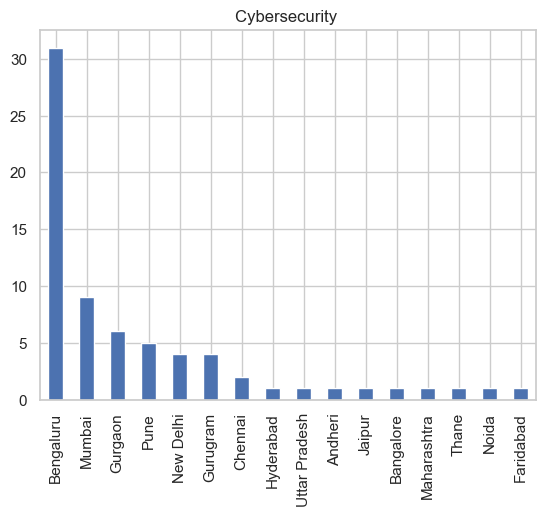

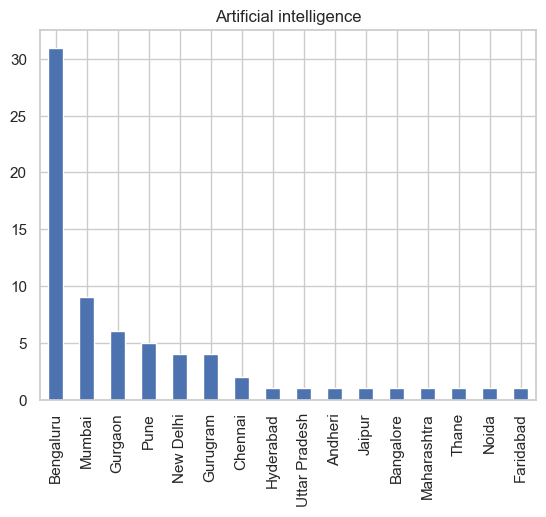

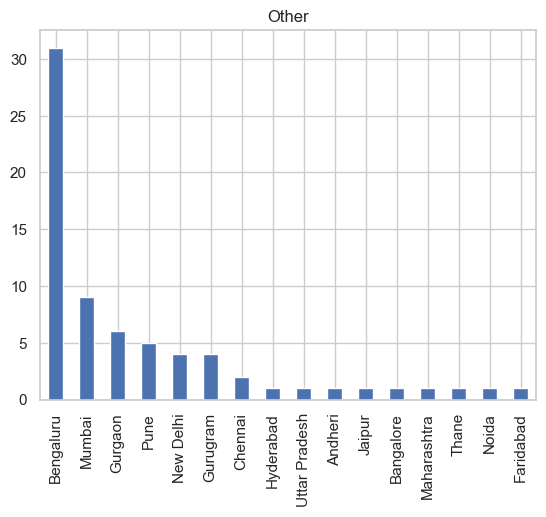

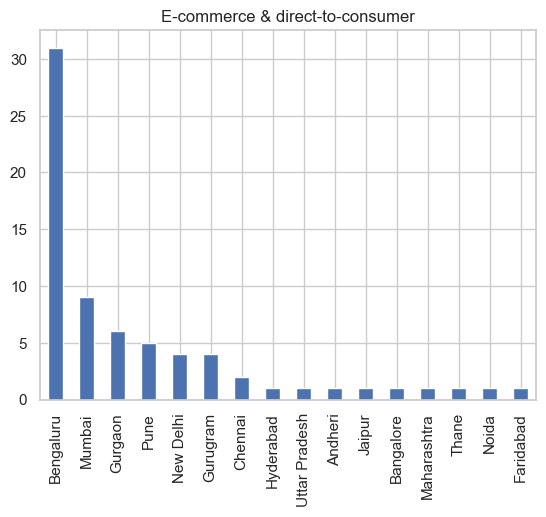

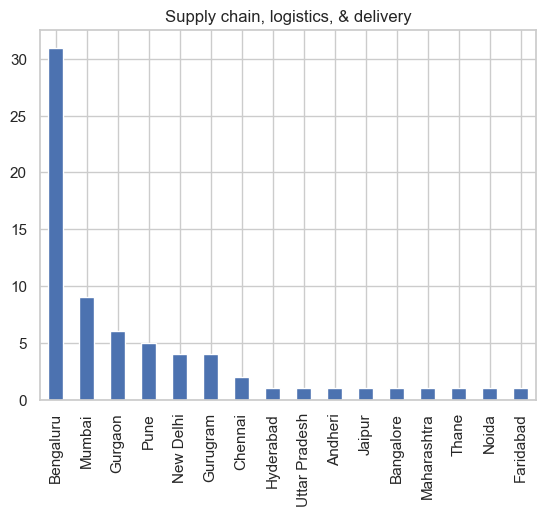

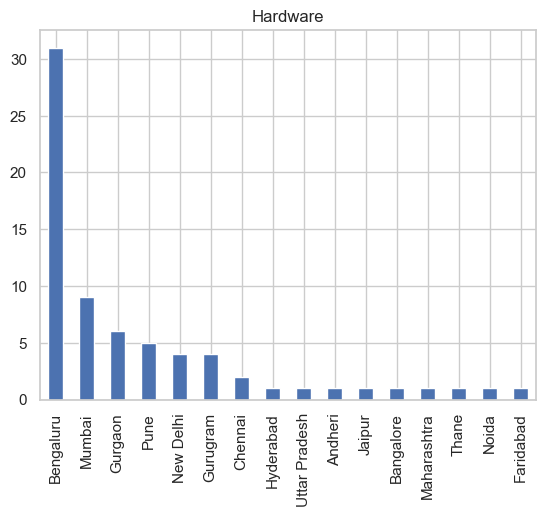

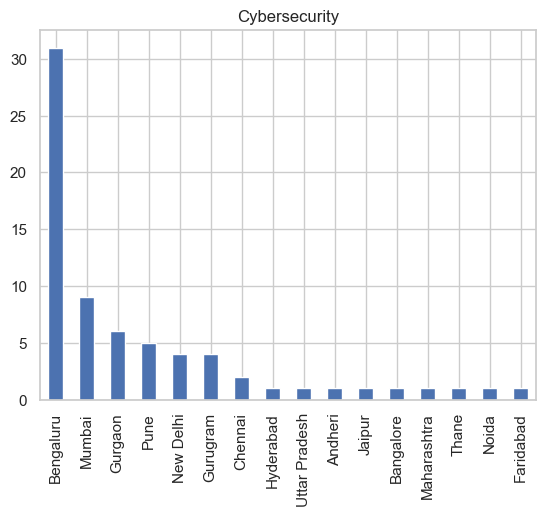

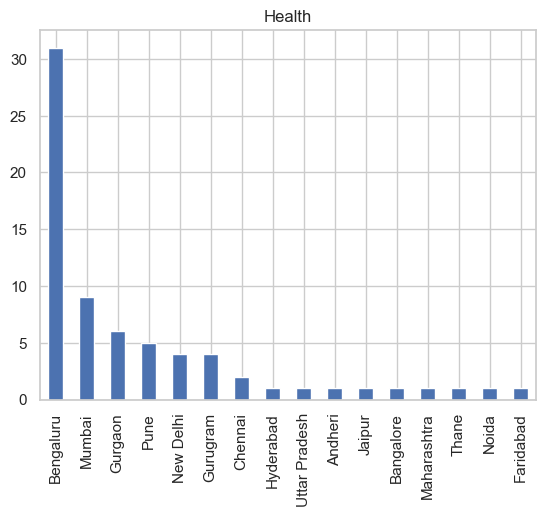

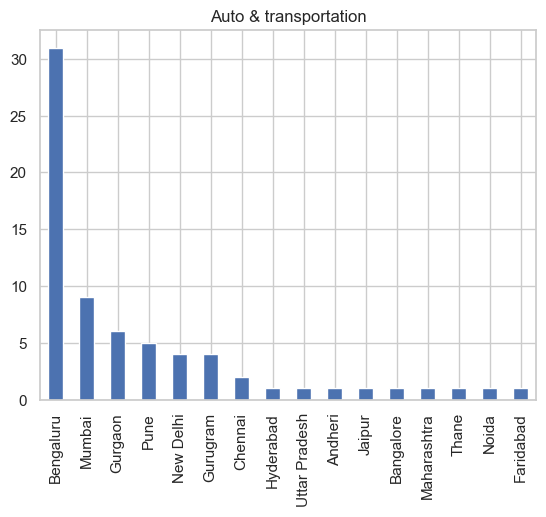

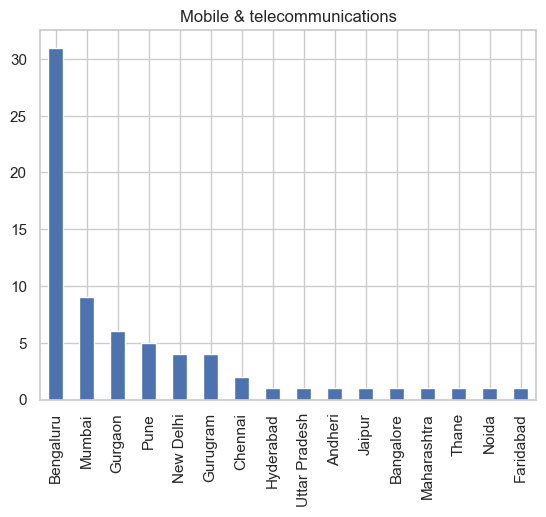

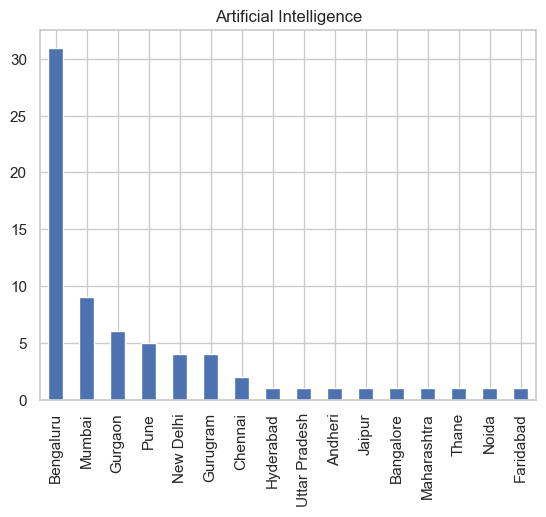

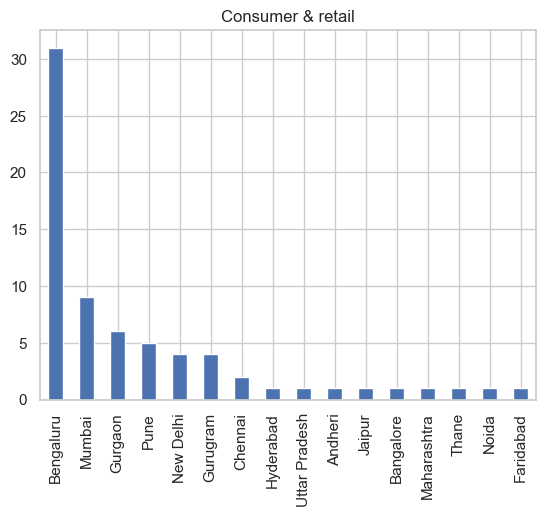

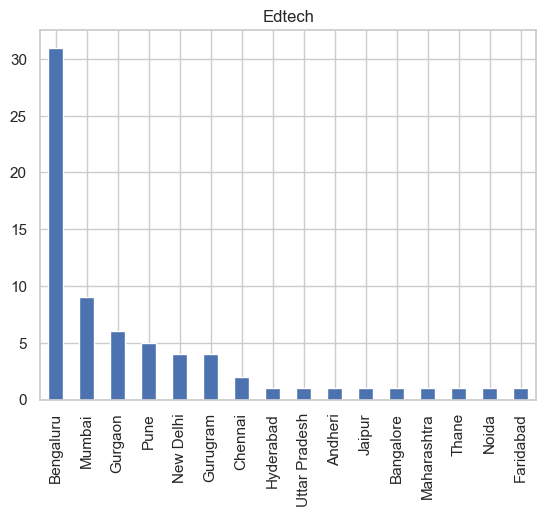

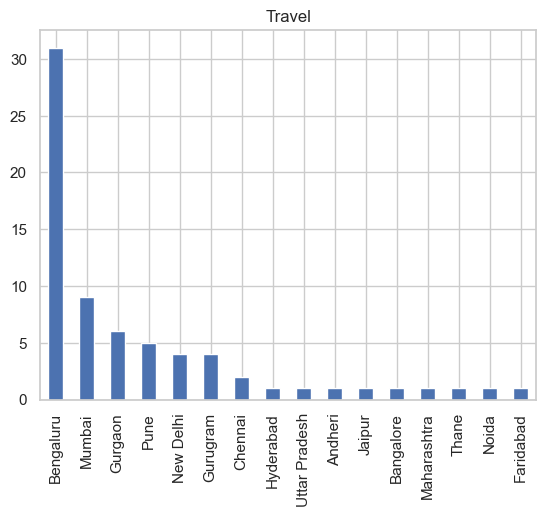

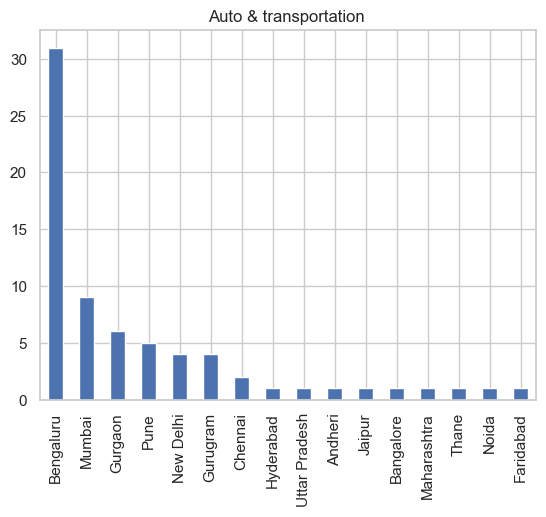

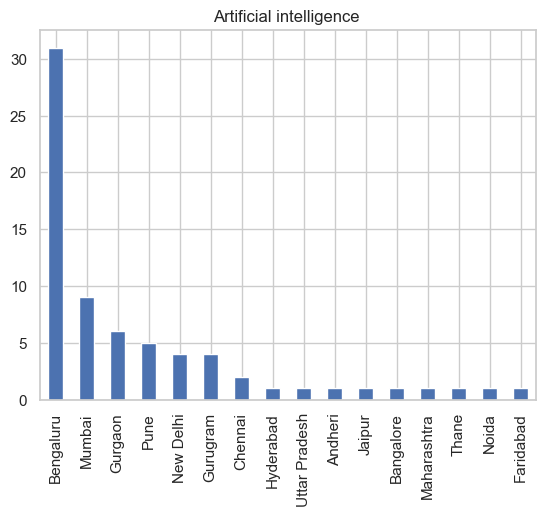

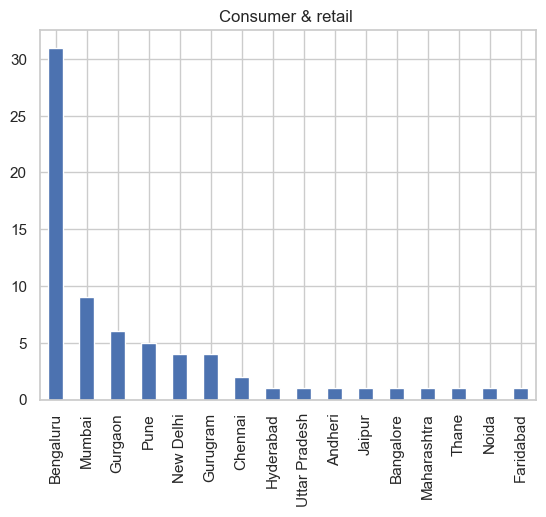

In [36]:
l=[]
for i in data.Industry.unique():
    l.append(i)
for i in  l:
    fin_df=data.loc[data['Industry'] == i]
    ind_fin_df=data.loc[data.Country.isin(['India'])]
    ind_fin_df['City'].value_counts().plot(kind='bar',title=i)
    plt.show()